# Training Models


Imports


In [4]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    accuracy_score,
    f1_score,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
from sklearn import tree
import pickle

In [5]:
df = pd.read_csv("../Data/cleaned_dataset.csv")

In [6]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [7]:
sm = SMOTE()

In [8]:
X_res, y_res = sm.fit_resample(X, y)

In [9]:
df = pd.concat([X_res, y_res], axis=1)

In [10]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [11]:
train_df.to_csv("../Data/TrainSet.csv", index=False)

In [12]:
test_df.to_csv("../Data/TestSet.csv", index=False)

Get the training features and label


In [15]:
X_train = train_df.iloc[:, :-1].to_numpy()
y_train = train_df.iloc[:, -1].to_numpy()

Get the testing features and label


In [16]:
X_test = test_df.iloc[:, :-1].to_numpy()
y_test = test_df.iloc[:, -1].to_numpy()

Initialize a 5-fold cross-validation object


In [17]:
KF = KFold(n_splits=5)

## KNN


In [13]:
KNN = KNeighborsClassifier()

In [14]:
param_grid = {"n_neighbors": list(range(1, int(np.sqrt(len(X_train))), 2))}

In [15]:
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=KF, verbose=2)

In [16]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits
[CV] END ......................................n_neighbors=1; total time=   0.2s


[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ...................

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59, ...]},
             verbose=2)

In [17]:
best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 1}


In [18]:
KNN_best = KNeighborsClassifier(**best_params)

In [19]:
KNN_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
predictions = KNN_best.predict(X_test)

In [21]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.94      0.69      0.80      1338
           1       0.76      0.96      0.85      1399

    accuracy                           0.83      2737
   macro avg       0.85      0.82      0.82      2737
weighted avg       0.85      0.83      0.82      2737



## Naive Bayes


In [22]:
NB = GaussianNB()

In [23]:
precisions = []
recalls = []
accuracies = []
f1_scores = []

In [24]:
fold = 1
for train, test in KF.split(X_train, y_train):
    print(f"##### FOLD: {fold} #####")

    # Fit the model
    NB.fit(X_train[train], y_train[train])

    # Predict on the test set
    predictions = NB.predict(X_train[test])

    # Evaluate the model
    precision = precision_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )
    recall = recall_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )
    accuracy = accuracy_score(y_true=y_train[test], y_pred=predictions)
    f1 = f1_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )

    # Store the result
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
    f1_scores.append(f1)

    # Print the scores for each fold
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"Accuracy = {accuracy}")
    print(f"F1 score = {f1}\n")

    fold += 1

##### FOLD: 1 #####
Precision = 0.706728486078468
Recall = 0.6100456621004566
Accuracy = 0.6100456621004566
F1 score = 0.5666835976181258

##### FOLD: 2 #####
Precision = 0.7360465364780924
Recall = 0.6511415525114155
Accuracy = 0.6511415525114155
F1 score = 0.6142546169457128

##### FOLD: 3 #####
Precision = 0.7306364197419802
Recall = 0.631795340338054
Accuracy = 0.631795340338054
F1 score = 0.5833146493305347

##### FOLD: 4 #####
Precision = 0.7343476228355168
Recall = 0.6372772955687529
Accuracy = 0.6372772955687529
F1 score = 0.6007169940128861

##### FOLD: 5 #####
Precision = 0.7248692414104398
Recall = 0.6263133851073549
Accuracy = 0.6263133851073549
F1 score = 0.5806506071921467



In [25]:
print("Mean Scores:")
print(f"Mean Precision = {np.mean(precisions)}")
print(f"Mean Recall = {np.mean(recalls)}")
print(f"Mean Accuracy = {np.mean(accuracies)}")
print(f"Mean F1 score = {np.mean(f1_scores)}")

Mean Scores:
Mean Precision = 0.7265256613088995
Mean Recall = 0.6313146471252067
Mean Accuracy = 0.6313146471252067
Mean F1 score = 0.5891240930198812


In [26]:
predictions = NB.predict(X_test)

In [27]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.29      0.43      1338
           1       0.58      0.95      0.72      1399

    accuracy                           0.63      2737
   macro avg       0.71      0.62      0.58      2737
weighted avg       0.71      0.63      0.58      2737



## CART


In [28]:
Cart = DecisionTreeClassifier()

In [29]:
param_grid = {
    "max_depth": [None, 10, 20, 30],
    "class_weight": [
        None,
        {0: 1, 1: 2},
        {0: 1, 1: 3},
        {0: 1.5, 1: 2.5},
        {0: 1.5, 1: 3},
    ],
    "ccp_alpha": [0, 1, 0.01, 0.001],
    "min_samples_split": [2, 3, 4],
}

In [30]:
grid_search = GridSearchCV(estimator=Cart, param_grid=param_grid, cv=KF, verbose=2)

In [31]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.3s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.3s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.3s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.3s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=2; total time=   0.3s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=3; total time=   0.3s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=3; total time=   0.3s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=3; total time=   0.3s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_samples_split=3; total time=   0.3s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, min_sa

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 1, 0.01, 0.001],
                         'class_weight': [None, {0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1.5, 1: 2.5}, {0: 1.5, 1: 3}],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 3, 4]},
             verbose=2)

In [32]:
best_params = grid_search.best_params_
print(best_params)

{'ccp_alpha': 0.001, 'class_weight': None, 'max_depth': 10, 'min_samples_split': 2}


In [33]:
Cart_best = DecisionTreeClassifier(**best_params)

In [34]:
Cart_best.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10)

In [35]:
predictions = Cart_best.predict(X_test)

In [36]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1338
           1       0.92      0.88      0.90      1399

    accuracy                           0.90      2737
   macro avg       0.90      0.90      0.90      2737
weighted avg       0.90      0.90      0.90      2737



[Text(0.605, 0.9545454545454546, 'x[444] <= 0.5\ngini = 0.5\nsamples = 10947\nvalue = [5504, 5443]'),
 Text(0.33, 0.8636363636363636, 'x[443] <= 0.5\ngini = 0.381\nsamples = 6498\nvalue = [1663, 4835]'),
 Text(0.16, 0.7727272727272727, 'x[412] <= 0.5\ngini = 0.156\nsamples = 4421\nvalue = [378, 4043]'),
 Text(0.12, 0.6818181818181818, 'x[9] <= 0.0\ngini = 0.104\nsamples = 4225\nvalue = [232, 3993]'),
 Text(0.08, 0.5909090909090909, 'x[382] <= -0.032\ngini = 0.334\nsamples = 458\nvalue = [97, 361]'),
 Text(0.04, 0.5, 'gini = 0.279\nsamples = 394\nvalue = [66, 328]'),
 Text(0.12, 0.5, 'x[7] <= 3.56\ngini = 0.5\nsamples = 64\nvalue = [31, 33]'),
 Text(0.08, 0.4090909090909091, 'gini = 0.327\nsamples = 34\nvalue = [7, 27]'),
 Text(0.16, 0.4090909090909091, 'gini = 0.32\nsamples = 30\nvalue = [24, 6]'),
 Text(0.16, 0.5909090909090909, 'gini = 0.069\nsamples = 3767\nvalue = [135, 3632]'),
 Text(0.2, 0.6818181818181818, 'gini = 0.38\nsamples = 196\nvalue = [146, 50]'),
 Text(0.5, 0.7727272727

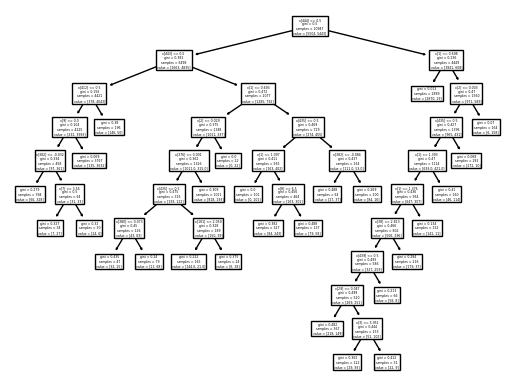

In [37]:
tree.plot_tree(Cart_best)

## Random Forest


In [38]:
RF = RandomForestClassifier(n_jobs=5)

In [39]:
param_grid = {
    "n_estimators": [50, 100, 200, 300, 400],
    "max_depth": [None, 10, 20, 30],
    "class_weight": [
        None,
        "balanced",
        "balanced_subsample",
        {0: 1, 1: 2},
        {0: 1, 1: 3},
        {0: 1.5, 1: 2.5},
        {0: 1.5, 1: 3},
    ],
    "ccp_alpha": [0, 1, 0.01, 0.001],
}

In [40]:
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=KF, verbose=2)

In [41]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=50; total time=   0.3s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ccp_alpha=0, class_weight=None, max_depth=None, n_estimators=100; total time=   0.4s
[

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=5),
             param_grid={'ccp_alpha': [0, 1, 0.01, 0.001],
                         'class_weight': [None, 'balanced',
                                          'balanced_subsample', {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1.5, 1: 2.5},
                                          {0: 1.5, 1: 3}],
                         'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200, 300, 400]},
             verbose=2)

In [42]:
best_params = grid_search.best_params_
print(best_params)

{'ccp_alpha': 0, 'class_weight': 'balanced', 'max_depth': 30, 'n_estimators': 300}


In [13]:
RF_best = RandomForestClassifier(**best_params)

In [18]:
RF_best.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0, class_weight='balanced', max_depth=30,
                       n_estimators=300)

In [19]:
predictions = RF_best.predict(X_test)

In [20]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1379
           1       0.93      0.91      0.92      1358

    accuracy                           0.92      2737
   macro avg       0.92      0.92      0.92      2737
weighted avg       0.92      0.92      0.92      2737



## Logistic Regression


In [47]:
LR = LogisticRegression(n_jobs=5)

In [48]:
param_grid = {
    "tol": [0.001, 0.0001, 0.00001],
    "solver": ["lbfgs", "liblinear"],
    "max_iter": [2000, 6000, 10000],
    "class_weight": [
        None,
        {0: 1, 1: 2},
        {0: 1, 1: 3},
        {0: 1.5, 1: 2.5},
        {0: 1.5, 1: 3},
    ],
}

In [49]:
grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=KF, verbose=2)

In [50]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.3s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   5.0s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.001; total time=   5.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.5s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   5.1s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   5.1s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   5.1s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.3s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   5.0s
[CV] END class_weight=None, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=0.001; total time=   5.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=0.001; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=0.001; total time=   5.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=0.001; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=0.0001; total time=   7.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=0.0001; total time=  12.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=0.0001; total time=   8.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=0.0001; total time=  10.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=0.0001; total time=   8.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=1e-05; total time=   8.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=1e-05; total time=  16.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=1e-05; total time=   9.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=1e-05; total time=  11.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=2000, solver=liblinear, tol=1e-05; total time=   9.2s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   7.0s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   9.7s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   9.9s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   9.6s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.001; total time=   9.0s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.4s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.4s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.4s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.3s
[CV] END class_weight=None, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.3s
[CV] END class_weight=None, max_it

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=0.001; total time=   5.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=0.001; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=0.001; total time=   5.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=0.001; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=0.0001; total time=   7.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=0.0001; total time=  12.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=0.0001; total time=   8.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=0.0001; total time=   9.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=0.0001; total time=   8.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=1e-05; total time=   7.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=1e-05; total time=  16.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=1e-05; total time=   9.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=1e-05; total time=  11.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=6000, solver=liblinear, tol=1e-05; total time=   9.2s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   7.1s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   9.8s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   9.9s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   9.6s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.001; total time=   9.0s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  12.8s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  17.3s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  19.3s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  15.6s
[CV] END class_weight=None, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  15.4s
[CV] END class_weight=No

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=0.001; total time=   5.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=0.001; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=0.001; total time=   5.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=0.001; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=0.0001; total time=   7.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=0.0001; total time=  12.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=0.0001; total time=   8.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=0.0001; total time=   9.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=0.0001; total time=   8.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=1e-05; total time=   7.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=1e-05; total time=  16.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=1e-05; total time=   9.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=1e-05; total time=  11.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight=None, max_iter=10000, solver=liblinear, tol=1e-05; total time=   9.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   3.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.0s
[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=0.001; total time=   7.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=0.001; total time=   7.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=0.001; total time=   7.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=0.001; total time=   5.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=0.001; total time=   7.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=0.0001; total time=   8.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=0.0001; total time=  17.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=0.0001; total time=   9.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=0.0001; total time=  10.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=0.0001; total time=   9.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=1e-05; total time=   8.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=1e-05; total time=  19.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=1e-05; total time=  10.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=1e-05; total time=  10.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=2000, solver=liblinear, tol=1e-05; total time=   9.4s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   8.0s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=  10.8s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=  11.3s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=  10.6s
[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.001; total time=  11.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  11.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  11.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  11.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=0.001; total time=   7.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=0.001; total time=   7.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=0.001; total time=   7.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=0.001; total time=   5.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=0.001; total time=   7.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=0.0001; total time=   8.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=0.0001; total time=  17.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=0.0001; total time=   9.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=0.0001; total time=  10.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=0.0001; total time=   9.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   8.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=1e-05; total time=  18.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=1e-05; total time=  10.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=1e-05; total time=  10.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   9.4s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   8.0s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=  10.9s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=  11.3s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=  10.5s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.001; total time=  11.1s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  13.5s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  16.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  19.9s
[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  17.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  19.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  19.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  20.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  20.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  20.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  19.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=0.001; total time=   7.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=0.001; total time=   7.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=0.001; total time=   7.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=0.001; total time=   5.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=0.001; total time=   7.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=0.0001; total time=   8.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=0.0001; total time=  17.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=0.0001; total time=   9.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=0.0001; total time=  10.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=0.0001; total time=   9.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   8.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=1e-05; total time=  19.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=1e-05; total time=  10.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=1e-05; total time=  10.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 2}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   9.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=0.001; total time=   7.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=0.001; total time=   7.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=0.001; total time=   9.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=0.001; total time=   7.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=0.001; total time=   9.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=0.0001; total time=   8.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=0.0001; total time=  12.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=0.0001; total time=  10.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=0.0001; total time=  12.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=0.0001; total time=  10.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=1e-05; total time=   8.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=1e-05; total time=  17.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=1e-05; total time=  11.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=1e-05; total time=  13.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=2000, solver=liblinear, tol=1e-05; total time=  10.9s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   7.4s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   9.8s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=  10.5s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=  10.7s
[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=  11.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  11.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=0.001; total time=   7.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=0.001; total time=   7.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=0.001; total time=   9.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=0.001; total time=   7.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=0.001; total time=   9.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=0.0001; total time=   8.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=0.0001; total time=  12.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=0.0001; total time=  10.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=0.0001; total time=  12.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=0.0001; total time=  10.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   8.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=  18.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=  11.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=  13.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=  11.1s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   7.7s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   9.7s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   9.9s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=  10.6s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=  11.3s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  13.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  19.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  20.0s
[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  19.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  19.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  20.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  20.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  19.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  19.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  20.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=0.001; total time=   7.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=0.001; total time=   7.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=0.001; total time=   9.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=0.001; total time=   7.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=0.001; total time=   9.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=0.0001; total time=   8.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=0.0001; total time=  12.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=0.0001; total time=  10.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=0.0001; total time=  12.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=0.0001; total time=  10.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   8.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=  17.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=  11.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=  13.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=  11.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=0.001; total time=   7.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=0.001; total time=   6.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=0.001; total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=0.001; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=0.0001; total time=   7.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=0.0001; total time=  15.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=0.0001; total time=  10.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=0.0001; total time=  10.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=0.0001; total time=   7.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=1e-05; total time=   8.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=1e-05; total time=  17.9s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=1e-05; total time=  11.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=1e-05; total time=  11.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=2000, solver=liblinear, tol=1e-05; total time=   8.5s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   9.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=  11.4s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=  10.3s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   9.5s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.001; total time=  11.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  11.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  11.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  11.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=0.001; total time=   7.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=0.001; total time=   6.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=0.001; total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=0.001; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=0.0001; total time=   7.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=0.0001; total time=  15.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=0.0001; total time=  10.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=0.0001; total time=  10.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=0.0001; total time=   7.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   8.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=1e-05; total time=  20.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=1e-05; total time=  11.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=1e-05; total time=  11.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   8.4s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   9.1s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=  11.3s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=  10.3s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   9.4s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.001; total time=  11.9s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  14.7s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  19.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  19.7s
[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  17.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  19.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  20.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  19.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  19.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  19.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  19.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=0.001; total time=   7.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=0.001; total time=   6.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=0.001; total time=   5.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=0.001; total time=   6.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=0.0001; total time=   7.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=0.0001; total time=  15.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=0.0001; total time=  10.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=0.0001; total time=  10.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=0.0001; total time=   7.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   8.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=1e-05; total time=  20.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=1e-05; total time=  11.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=1e-05; total time=  11.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 2.5}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   8.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=0.0001; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=lbfgs, tol=1e-05; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=0.001; total time=   6.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=0.001; total time=   9.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=0.001; total time=   8.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=0.001; total time=   7.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=0.001; total time=   6.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=0.0001; total time=   7.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=0.0001; total time=  15.1s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=0.0001; total time=  10.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=0.0001; total time=  11.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=0.0001; total time=  10.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=1e-05; total time=   8.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=1e-05; total time=  15.0s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=1e-05; total time=  11.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=1e-05; total time=  12.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=2000, solver=liblinear, tol=1e-05; total time=  11.0s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   7.5s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=  11.3s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=  11.9s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=   9.3s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.001; total time=  10.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  11.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=0.0001; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=lbfgs, tol=1e-05; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=0.001; total time=   6.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=0.001; total time=   9.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=0.001; total time=   8.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=0.001; total time=   7.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=0.001; total time=   6.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=0.0001; total time=   7.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=0.0001; total time=  19.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=0.0001; total time=  10.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=0.0001; total time=  11.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=0.0001; total time=  10.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=   8.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=  21.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=  11.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=  12.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=6000, solver=liblinear, tol=1e-05; total time=  10.9s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   7.5s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=  11.3s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=  11.9s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=   8.6s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.001; total time=  10.3s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  13.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  19.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  20.0s
[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  18.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=0.0001; total time=  19.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  19.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  19.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  19.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  19.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=lbfgs, tol=1e-05; total time=  19.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=0.001; total time=   6.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=0.001; total time=   9.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=0.001; total time=   8.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=0.001; total time=   7.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=0.001; total time=   6.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=0.0001; total time=   7.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=0.0001; total time=  19.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=0.0001; total time=  10.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=0.0001; total time=  11.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=0.0001; total time=  10.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=   8.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=  21.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=  11.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=  12.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  warnings.warn(


[CV] END class_weight={0: 1.5, 1: 3}, max_iter=10000, solver=liblinear, tol=1e-05; total time=  11.0s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(n_jobs=5),
             param_grid={'class_weight': [None, {0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1.5, 1: 2.5}, {0: 1.5, 1: 3}],
                         'max_iter': [2000, 6000, 10000],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.001, 0.0001, 1e-05]},
             verbose=2)

In [51]:
best_params = grid_search.best_params_
print(best_params)

{'class_weight': None, 'max_iter': 6000, 'solver': 'lbfgs', 'tol': 0.001}


In [52]:
LR_best = LogisticRegression(**best_params)

In [53]:
LR_best.fit(X_train, y_train)

LogisticRegression(max_iter=6000, tol=0.001)

In [54]:
predictions = LR_best.predict(X_test)

In [55]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1338
           1       0.93      0.89      0.91      1399

    accuracy                           0.91      2737
   macro avg       0.91      0.91      0.91      2737
weighted avg       0.91      0.91      0.91      2737



## SVM


In [56]:
SVM = SVC()

In [57]:
param_grid = {
    "tol": [0.001, 0.0001, 0.00001],
    "kernel": ["poly", "rbf", "sigmoid"],
    "class_weight": [
        None,
        {0: 1, 1: 2},
        {0: 1, 1: 2.5},
        {0: 1.5, 1: 2.5},
        {0: 1, 1: 3},
    ],
}

In [58]:
grid_search = GridSearchCV(estimator=SVM, param_grid=param_grid, cv=KF, verbose=2)

In [59]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=  20.4s
[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=  19.3s
[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=  20.3s
[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=  20.1s
[CV] END ..........class_weight=None, kernel=poly, tol=0.001; total time=  20.4s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=  20.2s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=  20.4s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=  20.3s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=  20.2s
[CV] END .........class_weight=None, kernel=poly, tol=0.0001; total time=  20.3s
[CV] END ..........class_weight=None, kernel=poly, tol=1e-05; total time=  20.2s
[CV] END ..........class_weight=None, kernel=poly, tol=1e-05; total time=  20.5s
[CV] END ..........class_wei

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'class_weight': [None, {0: 1, 1: 2}, {0: 1, 1: 2.5},
                                          {0: 1.5, 1: 2.5}, {0: 1, 1: 3}],
                         'kernel': ['poly', 'rbf', 'sigmoid'],
                         'tol': [0.001, 0.0001, 1e-05]},
             verbose=2)

In [60]:
best_params = grid_search.best_params_
print(best_params)

{'class_weight': None, 'kernel': 'rbf', 'tol': 0.001}


In [61]:
SVM_best = SVC(**best_params)

In [62]:
SVM_best.fit(X_train, y_train)

SVC()

In [63]:
predictions = SVM_best.predict(X_test)

In [64]:
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.79      0.52      0.63      1338
           1       0.65      0.86      0.74      1399

    accuracy                           0.70      2737
   macro avg       0.72      0.69      0.69      2737
weighted avg       0.72      0.70      0.69      2737



## Neural Network


In [65]:
early_stopping = EarlyStopping(monitor="val_loss", patience=10, mode="min", verbose=1)

In [66]:
nn = Sequential()
nn.add(Dense(256, activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(1, activation="sigmoid"))

nn.compile(optimizer="adam", loss="binary_crossentropy")

In [67]:
precisions = []
recalls = []
accuracies = []
f1_scores = []

In [68]:
fold = 1
for train, test in KF.split(X_train, y_train):
    print(f"##### FOLD: {fold} #####")

    # Fit the model
    nn.fit(
        X_train[train],
        y_train[train],
        epochs=200,
        batch_size=32,
        validation_data=(X_train[test], y_train[test]),
        callbacks=[early_stopping],
        verbose=0,
    )

    # Predict on the test set
    y_pred = nn.predict(X_train[test])

    predictions = []
    for pred in y_pred:
        if pred > 0.5:
            predictions.append(1)
        else:
            predictions.append(0)

    # Evaluate the model
    precision = precision_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )
    recall = recall_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )
    accuracy = accuracy_score(y_true=y_train[test], y_pred=predictions)
    f1 = f1_score(
        y_true=y_train[test],
        y_pred=predictions,
        zero_division=0,
        average="weighted",
    )

    # Store the result
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
    f1_scores.append(f1)

    # Print the scores for each fold
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"Accuracy = {accuracy}")
    print(f"F1 score = {f1}\n")

    fold += 1

##### FOLD: 1 #####
Epoch 16: early stopping
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step
Precision = 0.9051438983835355
Recall = 0.9031963470319635
Accuracy = 0.9031963470319635
F1 score = 0.902952999488052

##### FOLD: 2 #####
Epoch 16: early stopping
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
Precision = 0.9307245510600914
Recall = 0.9305936073059361
Accuracy = 0.9305936073059361
F1 score = 0.9305962122164209

##### FOLD: 3 #####
Epoch 13: early stopping
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
Precision = 0.9503892043835003
Recall = 0.9502055733211512
Accuracy = 0.9502055733211512
F1 score = 0.9502099382257788

##### FOLD: 4 #####
Epoch 13: early stopping
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step
Precision = 0.9589138960199913
Recall = 0.9588853357697579
Accuracy = 0.9588853357697579
F1 score = 0.958879581541629

##### FOLD: 5 #####
Epoch 13: early stopping
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
Precision = 0.9739930552445561
Recall = 0.9739607126541799
Accuracy = 0.9739607126541799
F1 

In [69]:
print("Mean Scores:")
print(f"Mean Precision = {np.mean(precisions)}")
print(f"Mean Recall = {np.mean(recalls)}")
print(f"Mean Accuracy = {np.mean(accuracies)}")
print(f"Mean F1 score = {np.mean(f1_scores)}")

Mean Scores:
Mean Precision = 0.9438329210183349
Mean Recall = 0.9433683152165976
Mean Accuracy = 0.9433683152165976
Mean F1 score = 0.9433198301351473


In [70]:
y_pred = nn.predict(X_test)

predictions = []
for pred in y_pred:
    if pred > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

 1/86 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step


In [71]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1338
           1       0.90      0.91      0.91      1399

    accuracy                           0.90      2737
   macro avg       0.90      0.90      0.90      2737
weighted avg       0.90      0.90      0.90      2737



## Save Best Model


In [21]:
with open("../RandomForestModel.pkl", "wb") as f:
    pickle.dump(RF_best, f)